## Business Objective/Problem
- Bơ 'Hass', một công ty có trụ sở tại Mexico, sản xuất nhiều loại bơ được bán ở Mỹ. Họ đã rất thành công trong những năm gần đây và muốn mở rộng. Vì vậy, họ muốn xay dựng mô hình hợp lý để dự đoán giá trung bình của bơ 'Hass' ở Mỹ nhằm xem xét việc mở rộng các loại trang trại Bơ đang có cho việc trồng bơ ở các vùng khác.

## Triển khai dự án

### Bước 1: Business Understanding
- Hiện tại, công ty kinh doanh quả bơ ở rất nhiều vùng của nước Mỹ với 2 loại bơ là bơ thường và bơ hữu cơ, được đóng gói theo nhiều quy chuẩn (Small/Large/XLarge Bags), và có 3 PLU (Product Look Up) khác nhau (4046, 4225, 4770). Nhưng họ chưa có mô hình để dự đoán giá bơ cho việc mở rộng.
- Mục tiêu/ Vấn đề: Xây dựng mô hình dự đoán giá trung bình của bơ “Hass” ở Mỹ => xem xét việc mở rộng sản xuất, kinh doanh.

### Bước 2: Data Understanding
Từ mục tiêu/ vấn đề đã xác định: xem xét các dữ liệu mà công ty đang có:
- Dữ liệu được lấy trực tiếp từ máy tính tiền của các nhà bán lẻ dựa trên doanh số bán lẻ thực tế của bơ Hass.
- Dữ liệu đại diện cho dữ liệu lấy từ máy quét bán lẻ hàng tuần cho lượng bán lẻ (National retail volume- units) và giá bơ từ tháng 4/2015 đến tháng 3/2018.  
- Giá Trung bình (Average Price) trong bảng phản ánh giá trên một đơn vị (mỗi quả bơ), ngay cả khi nhiều đơn vị (bơ) được bán trong bao.  
- Mã tra cứu sản phẩm - Product Lookup codes (PLU’s) trong bảng chỉ dành cho bơ Hass, không dành cho các sản phẩm khác.  

Toàn bộ dữ liệu được đổ ra và lưu trữ trong tập tin avocado.csv với 18249 record. Với các cột:
- Date - ngày ghi nhận
- AveragePrice – giá trung bình của một quả bơ
- Type - conventional / organic – loại: thông thường/ hữu cơ
- Region – vùng được bán
- Total Volume – tổng số bơ đã bán
- 4046 – tổng số bơ có mã PLU 4046 đã bán
- 4225 - tổng số bơ có mã PLU 4225 đã bán
- 4770 - tổng số bơ có mã PLU 4770 đã bán
- Total Bags – tổng số túi đã bán
- Small/Large/XLarge Bags – tổng số túi đã bán theo size  

Có hai loại bơ trong tập dữ liệu và một số vùng khác nhau. Điều này cho phép chúng ta thực hiện tất cả các loại phân tích cho các vùng khác nhau, hoặc phân tích toàn bộ nước Mỹ theo một trong hai loại bơ.  

=> Có thể tập trung giải quyết hai bài toán:
- Bài toán 1: USA’s Avocado AveragePrice Prediction – Sử dụng các thuật toán Regression như Linear Regression, Random Forest, XGB Regressor...  
- Bài toán 2: Conventional/Organic Avocado Average Price Prediction for the future in California/NewYork… - sử dụng các thuật toán Time Series như ARIMA, Prophet...  

### Bước 3: Data preparation/ Prepare
 Từ bước 3 trở đi cách triển khai cho hai bài toán sẽ khác nhau.

In [ ]:
#!pip install pandas-profiling==2.7.1

In [ ]:
!pip install fbprophet

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 33.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
#!pip install xgboost

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive/LDS0_k271_HuynhKimTho/Project_1'

/content/gdrive/MyDrive/LDS0_k271_HuynhKimTho/Project_1


In [ ]:
#Nhập các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#%pylab inline
#matplotlib.matplotlib_fname()


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
import pandas_profiling as pp

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor

import datetime
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy
from math import sqrt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot



In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
#Đọc dữ liệu
data = pd.read_csv('avocado.csv')

In [ ]:
#Xem thông tin tổng quát
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany


In [ ]:
#Bỏ đi cột 'Unnamed'
data = data.drop(data.columns[0],axis=1)

In [ ]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany


## Bài toán 2 - USA’s Avocado AveragePrice Prediction
Conventional/Organic Avocado Average Price Prediction for the future in California/NewYork… - sử dụng các thuật toán Time Series như ARIMA, Prophet...  

### Yêu cầu 3:
-Thực hiện các thuật toán ARIMA, Facebook Prophet... để dự đoán giá, khả năng mở rộng trong tương lai của Conventional Avocado ở vùng California.  
-Tổng hợp kết quả thu được

### Tìm hiểu và khám phá dữ liệu - EDA
Đã trình bày cụ thể trong bài toán 1, nên trong bài toán 2 sẽ không thể hiện phần này.

In [ ]:
#Lọc ra vùng 'California' và bơ thường 'conventional'
temp_df = data[(data['region'] == 'California') & (data['type'] == 'conventional')]
temp_df = temp_df.sort_values(by=['Date'], ascending=True)
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 363 to 8550
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          169 non-null    object 
 1   AveragePrice  169 non-null    float64
 2   Total Volume  169 non-null    float64
 3   4046          169 non-null    float64
 4   4225          169 non-null    float64
 5   4770          169 non-null    float64
 6   Total Bags    169 non-null    float64
 7   Small Bags    169 non-null    float64
 8   Large Bags    169 non-null    float64
 9   XLarge Bags   169 non-null    float64
 10  type          169 non-null    object 
 11  year          169 non-null    int64  
 12  region        169 non-null    object 
dtypes: float64(9), int64(1), object(3)
memory usage: 18.5+ KB


In [ ]:
temp_df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
363,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,2015,California
362,2015-01-11,0.92,6024932.34,2889591.29,2485720.10,103573.42,546047.53,510560.41,31874.03,3613.09,conventional,2015,California
361,2015-01-18,1.02,5570915.26,2780859.66,2108450.36,121614.31,559990.93,520299.26,36501.18,3190.49,conventional,2015,California
360,2015-01-25,1.06,4929884.26,2380955.61,1827783.28,150535.50,570609.87,521004.15,46809.48,2796.24,conventional,2015,California
359,2015-02-01,0.85,9032180.67,4794142.14,3460743.80,177145.49,600149.24,556205.20,41203.20,2740.84,conventional,2015,California


In [ ]:
temp_df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8554,2018-02-25,1.03,6750361.46,2666133.31,1947660.32,110662.05,2025905.78,1908897.38,42064.35,74944.05,conventional,2018,California
8553,2018-03-04,1.13,6295529.61,2380723.98,1676629.99,116796.74,2121378.90,1992549.07,47126.97,81702.86,conventional,2018,California
8552,2018-03-11,1.11,6488605.43,2277437.31,1750118.87,108244.33,2352804.92,2230913.33,41105.34,80786.25,conventional,2018,California
8551,2018-03-18,1.02,6802084.11,2161037.82,2305253.24,94087.86,2241705.19,2116307.93,38597.17,86800.09,conventional,2018,California
8550,2018-03-25,1.04,6687009.44,1932162.02,2715163.60,92955.04,1946728.78,1827362.50,37434.21,81932.07,conventional,2018,California


In [ ]:
#Lấy thuộc tính 'Date' và 'AveragePrice'
df = temp_df[['Date','AveragePrice']]
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 363 to 8550
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          169 non-null    datetime64[ns]
 1   AveragePrice  169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


In [ ]:
#Reset lại index
df.reset_index(inplace=True)
df = df.drop('index', axis=1)
df.head()

,Date,AveragePrice
0,2015-01-04,0.93
1,2015-01-11,0.92
2,2015-01-18,1.02
3,2015-01-25,1.06
4,2015-02-01,0.85


In [ ]:
df.tail()

,Date,AveragePrice
164,2018-02-25,1.03
165,2018-03-04,1.13
166,2018-03-11,1.11
167,2018-03-18,1.02
168,2018-03-25,1.04


#### Sử dụng thuật toán Facebook Prophet

In [ ]:
#Tạo 1 bộ dữ liệu mới, không sử dụng bộ dữ liệu gốc
df_pf = df.copy()

In [ ]:
df_pf.columns = ['ds','y']
df_pf.y = df_pf.y.astype(float)
df_pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      169 non-null    datetime64[ns]
 1   y       169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


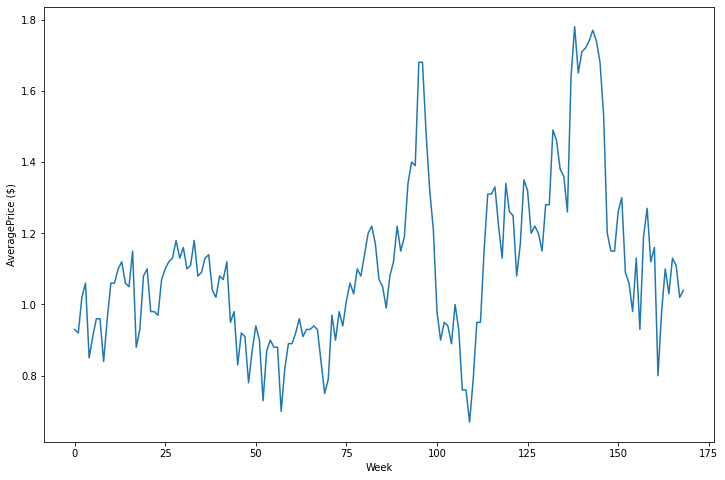

In [ ]:
#Trực quan hóa
plt.figure(figsize=(12,8))
plt.plot(df_pf.y)
plt.xlabel('Week')
plt.ylabel('AveragePrice ($)')
plt.show()

In [ ]:
#Chia bộ dữ liệu train và test theo tỉ lể 80:20
train = df_pf.iloc[df_pf.index[0:int(len(df_pf)*0.8)],:]
train.tail()

,ds,y
130,2017-07-02,1.28
131,2017-07-09,1.28
132,2017-07-16,1.49
133,2017-07-23,1.46
134,2017-07-30,1.38


In [ ]:
test = df_pf.iloc[df_pf.index[int(len(df_pf)*0.8):],:]
test.head()

,ds,y
135,2017-08-06,1.36
136,2017-08-13,1.26
137,2017-08-20,1.64
138,2017-08-27,1.78
139,2017-09-03,1.65


In [ ]:
len(train), len(test)

(135, 34)

In [ ]:
#Xây dựng model Prophet theo tuần 'weekly'
pf_model = Prophet(yearly_seasonality = True, \
               daily_seasonality=False, weekly_seasonality=False)

In [ ]:
#Huấn luyện model
pf_model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [ ]:
#34 weeks in test and 16 weeks to predict new values
weeks = pd.date_range('2017-08-06','2018-07-15',
                      freq='W').strftime('%Y-%m-%d').tolist()
future = pd.DataFrame(weeks)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

In [ ]:
#Use the model to make a forecast
forecast = pf_model.predict(future)

In [ ]:
forecast[['ds','yhat']].head(10)

,ds,yhat
0,2017-08-06,1.41
1,2017-08-13,1.37
2,2017-08-20,1.33
3,2017-08-27,1.32
4,2017-09-03,1.35
5,2017-09-10,1.39
6,2017-09-17,1.41
7,2017-09-24,1.41
8,2017-10-01,1.40
9,2017-10-08,1.43


#### Đánh giá model

In [ ]:
df_pf.y.mean()

1.1054437869822493

In [ ]:
test.y.mean()

1.2876470588235291

In [ ]:
#Tính MAE
y_test = test['y'].values
y_pred = forecast['yhat'].values[:34]
mae_p = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' %mae_p)
print('Sai số của MAE so với dữ liệu test:', round(mae_p/test.y.mean()*100,2),'%')
print('Sai số của MAE so với all data:', round(mae_p/df_pf.y.mean()*100,2),'%')


MAE: 0.228
Sai số của MAE so với dữ liệu test: 17.7 %
Sai số của MAE so với all data: 20.62 %


In [ ]:
#Tính RMSE
rmse_p = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: %.3f' % rmse_p)
print('Sai số của RMSE so với dữ liệu test:', round(rmse_p/test.y.mean()*100,2),'%')
print('Sai số của RMSE so với all data:', round(rmse_p/df_pf.y.mean()*100,2),'%')

RMSE: 0.265
Sai số của RMSE so với dữ liệu test: 20.6 %
Sai số của RMSE so với all data: 23.99 %


#### Nhận xét:
- So với mean_test = 1.287, mae và rmse tính ra là 17.7% và 20.6%.
- So với mean all data = 1.105, mae và rmse tính ra là 20.62% và 23.99%.
- Sai số của mae và rmse là khá lớn, cho nên model theo fbprophet cần cải thiện thêm để giảm sai số xuống.

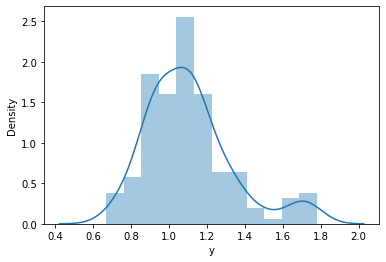

In [ ]:
sns.distplot(df_pf.y)

In [ ]:
y_test_value = pd.DataFrame(y_test, index = pd.to_datetime(test['ds']),columns=['Actual'])
y_pred_value = pd.DataFrame(y_pred, index = pd.to_datetime(test['ds']),columns=['Prediction'])

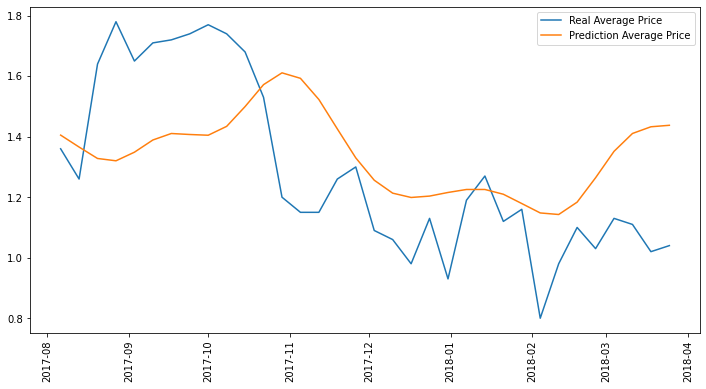

In [ ]:
# Visulaize the result
plt.figure(figsize=(12,6))
plt.plot(y_test_value, label='Real Average Price')
plt.plot(y_pred_value, label='Prediction Average Price')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

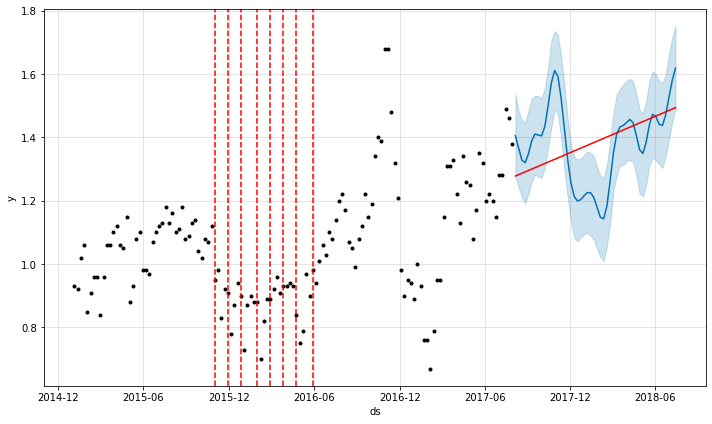

In [ ]:
#Trực quan hóa
fig = pf_model.plot(forecast)
fig.show()
a = add_changepoints_to_plot(fig.gca(), pf_model, forecast)
#plt.show()

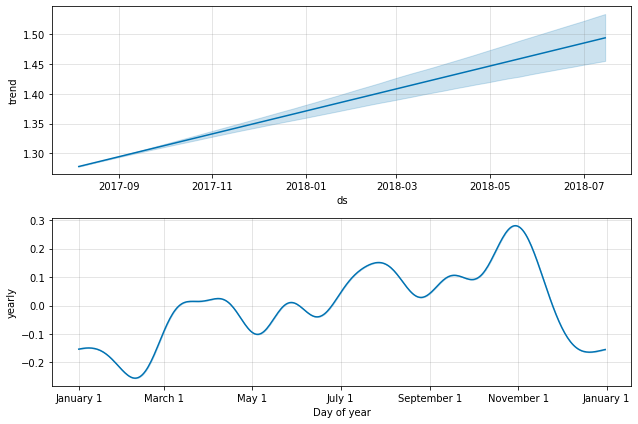

In [ ]:
fig1 = pf_model.plot_components(forecast)
fig1.show()

In [ ]:
#Prediction for the next 16 weeks
forecast[['ds','yhat']].tail(16)

,ds,yhat
34,2018-04-01,1.45
35,2018-04-08,1.46
36,2018-04-15,1.45
37,2018-04-22,1.41
38,2018-04-29,1.36
39,2018-05-06,1.35
40,2018-05-13,1.38
41,2018-05-20,1.44
42,2018-05-27,1.47
43,2018-06-03,1.47


### Sử dụng ARIMA

In [ ]:
#Tạo bộ dữ liệu cho phân tích theo ARIMA
df_ar = df.copy()
df_ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          169 non-null    datetime64[ns]
 1   AveragePrice  169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


In [ ]:
df_ar.head()

,Date,AveragePrice
0,2015-01-04,0.93
1,2015-01-11,0.92
2,2015-01-18,1.02
3,2015-01-25,1.06
4,2015-02-01,0.85


In [ ]:
df_ar.index = df_ar.Date
df_ar = df_ar.drop('Date',axis=1)
df_ar.index = pd.to_datetime(df_ar.index)
df_ar.head()

,AveragePrice
Date,
2015-01-04,0.93
2015-01-11,0.92
2015-01-18,1.02
2015-01-25,1.06
2015-02-01,0.85


In [ ]:
result = seasonal_decompose(df_ar, model ='multiplicative') # Theo tuần
result

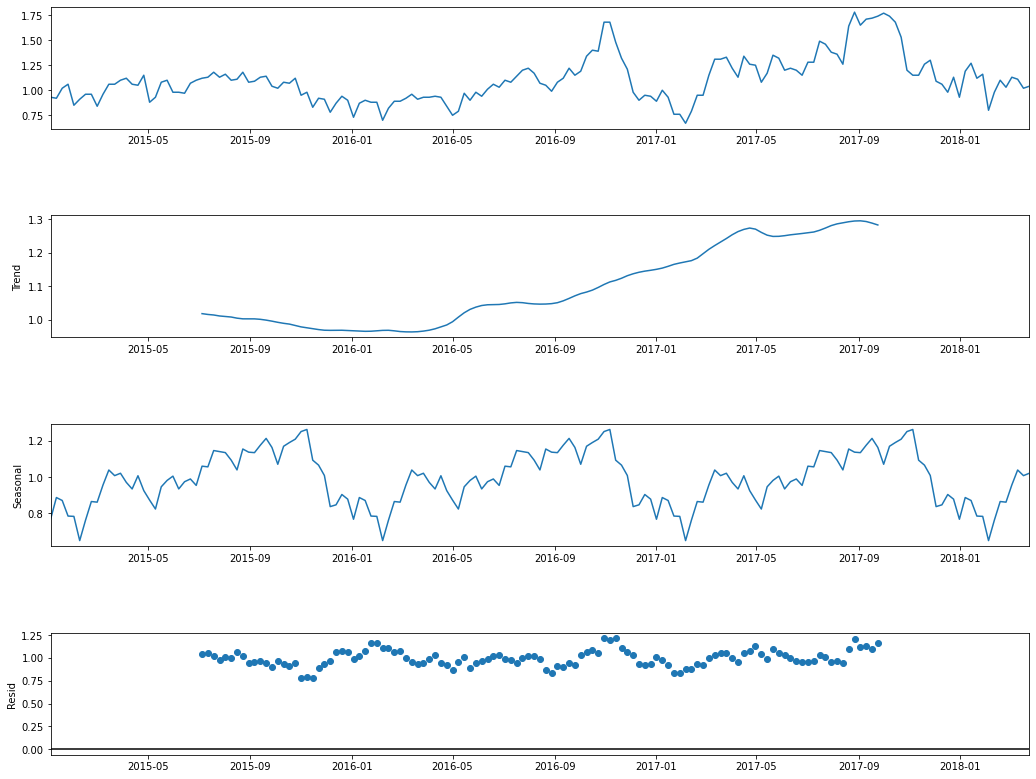

In [ ]:
#Trực quan hóa
fig = result.plot()
fig.set_size_inches(16, 12)
plt.show()

#### Nhận xét:
- Dữ liệu có xu hướng tăng từ tháng 5/2016 đến tháng 9/2017
- Dữ liệu có xu hướng theo năm
- Dữ liệu phân bố tự nhiên độc lập

In [ ]:
#Sử dụng auto_arima để tìm ra bộ thông số tối ưu - 'Seasonal' và theo tuần
stepwise_model = auto_arima(df_ar, start_p=2, start_q=2,
                            max_p=5, max_q=5,m=52, start_P=1, seasonal=True, d=1, D=1)

In [ ]:
print(stepwise_model.aic())

-151.8967052693947


In [ ]:
#Chia bộ dữ liệu train, test theo tỉ lệ 80:20
train_ar, test_ar = df_ar[0:int(len(df_ar)*0.8)], df_ar[int(len(df_ar)*0.8):]

In [ ]:
test_ar.head()

,AveragePrice
Date,
2017-08-06,1.36
2017-08-13,1.26
2017-08-20,1.64
2017-08-27,1.78
2017-09-03,1.65


In [ ]:
len(test_ar)

34

In [ ]:
#Huấn luyện model
stepwise_model.fit(train_ar)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 52),
      suppress_warnings=True, with_intercept=False)

In [ ]:
#Dự đoán kết quả
future_forecast = stepwise_model.predict(n_periods=len(test_ar))

In [ ]:
future_forecast

array([1.33163806, 1.26205932, 1.26690042, 1.19916435, 1.27114637,
       1.31251919, 1.39142918, 1.31491747, 1.34083391, 1.46921277,
       1.51241093, 1.51757503, 1.69444147, 1.70207713, 1.5145977 ,
       1.41639801, 1.33118009, 1.1259379 , 1.08793728, 1.14293298,
       1.12558677, 1.04603764, 1.1634684 , 1.11815371, 0.98516313,
       0.98518032, 0.87300132, 0.99301241, 1.13082851, 1.13083567,
       1.28892167, 1.41933588, 1.40701025, 1.42701323])

In [ ]:
#Chuyển thành DataFrame
future_forecast = pd.DataFrame(future_forecast,index = test_ar.index,columns=['Prediction'])
future_forecast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34 entries, 2017-08-06 to 2018-03-25
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prediction  34 non-null     float64
dtypes: float64(1)
memory usage: 544.0 bytes


In [ ]:
future_forecast.head()

,Prediction
Date,
2017-08-06,1.33
2017-08-13,1.26
2017-08-20,1.27
2017-08-27,1.20
2017-09-03,1.27


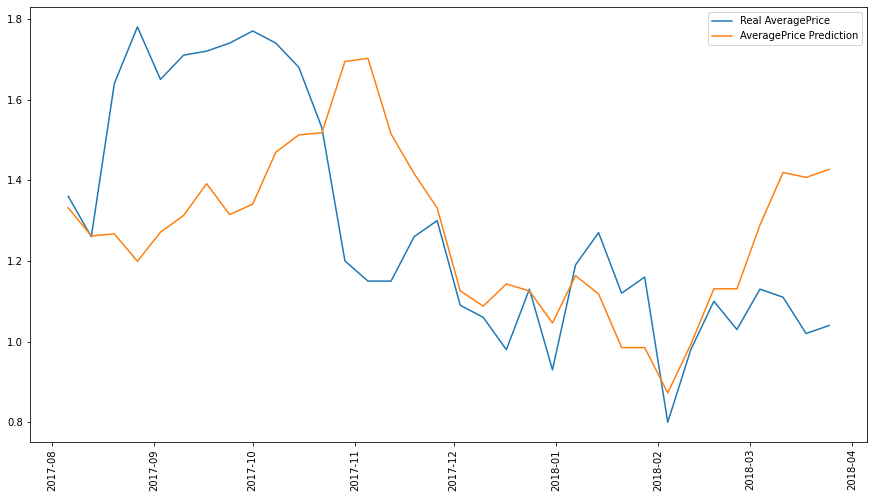

In [ ]:
#Trực quan hóa so sánh giá trị thực và giá trị dự đoán của bộ test
plt.figure(figsize=(15,8))
plt.plot(test_ar, label='Real AveragePrice')
plt.plot(future_forecast, label='AveragePrice Prediction')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

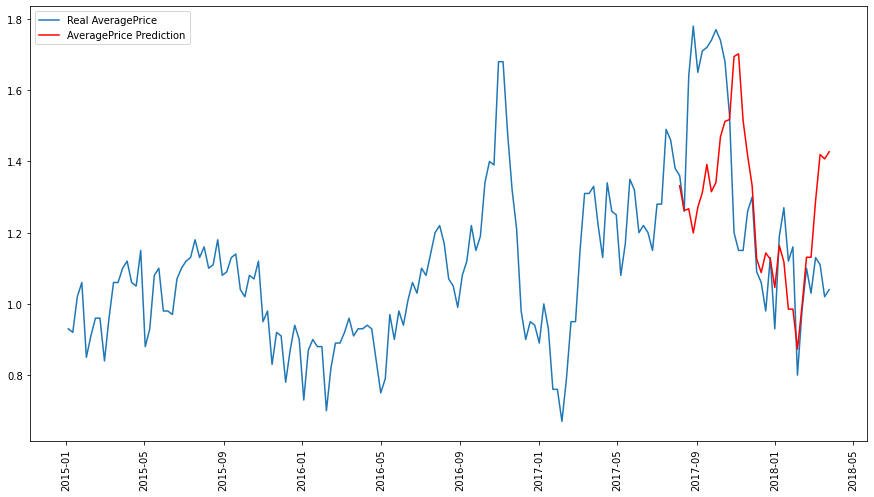

In [ ]:
#Trực quan hóa toàn bộ dữ liệu với phần dự đoán
plt.figure(figsize=(15,8))
plt.plot(df_ar, label='Real AveragePrice')
plt.plot(future_forecast, label='AveragePrice Prediction',color='Red')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [ ]:
test_ar.mean()[0]

1.2876470588235291

In [ ]:
df_ar.mean()[0]

1.1054437869822493

In [ ]:
#Tính MAE
mae = mean_absolute_error(test_ar, future_forecast[0:len(test_ar)])
print('MAE: %.3f' %mae)
print('Sai số của MAE so với dữ liệu test:', round(mae/test_ar.mean()[0]*100,2),'%')
print('Sai số của MAE so với all data:', round(mae/df_ar.mean()[0]*100,2),'%')

MAE: 0.214
Sai số của MAE so với dữ liệu test: 16.65 %
Sai số của MAE so với all data: 19.39 %


In [ ]:
#Tính MAE
rmse = sqrt(mean_squared_error(test_ar, future_forecast[0:len(test_ar)]))
print('RMSE: %.3f' %rmse)
print('Sai số của RMSE so với dữ liệu test:', round(rmse/test_ar.mean()[0]*100,2),'%')
print('Sai số của RMSE so với all data:', round(rmse/df_ar.mean()[0]*100,2),'%')

RMSE: 0.277
Sai số của RMSE so với dữ liệu test: 21.53 %
Sai số của RMSE so với all data: 25.08 %


#### Nhận xét:
- So với mean_test = 1.935, mae và rmse tính ra là 16.65% và 21.53%, nhỏ hơn các giá trị tính theo prophet.  
- So với mean all data = 1.685, mae và rmse tính ra là 19.39% và 25.08%, nhỏ hơn các giá trị tính theo prophet.  
- Ta thấy sai số của mae và rmse khi tính theo ARIMA thì nhỏ hơn so với theo prophet, cho nên model theo ARIMA sẽ chính xác hơn để dự đoán các giá trị tương lai.
- Tổng thể, mae và rmse có sai lệch cũng hơi lớn 1 chút, cho nên model nên được cải thiện thêm để nâng cao độ chính xác.

In [ ]:
#Dự đoán cho 16 tuần tiếp theo
future_forecast_new = stepwise_model.predict(n_periods=len(test_ar)+16) #34 tuần + 16 tuần cần dự đoán
future_forecast_new

array([1.33163806, 1.26205932, 1.26690042, 1.19916435, 1.27114637,
       1.31251919, 1.39142918, 1.31491747, 1.34083391, 1.46921277,
       1.51241093, 1.51757503, 1.69444147, 1.70207713, 1.5145977 ,
       1.41639801, 1.33118009, 1.1259379 , 1.08793728, 1.14293298,
       1.12558677, 1.04603764, 1.1634684 , 1.11815371, 0.98516313,
       0.98518032, 0.87300132, 0.99301241, 1.13082851, 1.13083567,
       1.28892167, 1.41933588, 1.40701025, 1.42701323, 1.34414017,
       1.27880077, 1.43455323, 1.3520886 , 1.32236266, 1.20414668,
       1.31634013, 1.43469396, 1.43181892, 1.33154619, 1.3638758 ,
       1.36113709, 1.316069  , 1.43127393, 1.4263423 , 1.59935438])

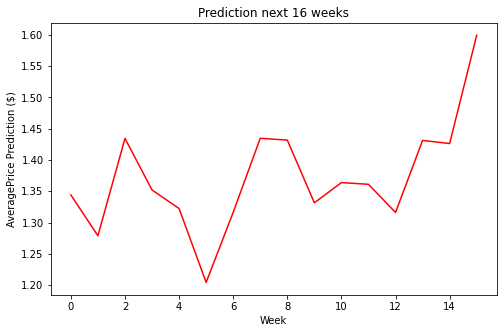

In [ ]:
#Trực quan hóa xem dự đoán của các tuần trong tương lai
plt.figure(figsize=(8,5))
plt.plot(future_forecast_new[len(test_ar):], color='red')
plt.xlabel('Week')
plt.ylabel('AveragePrice Prediction ($)')
plt.title('Prediction next 16 weeks')
plt.show()